In [86]:
from cal_pearson import *

detail_path = "/public3/YHC/mod_result/oryza_mod_result.txt"
bisulfite_path = "/mnt/sdg2/oryza/Ory.CpG.gz.bismark.zero.cov"

In [87]:
detail_dict, detail_set = load_detail_dict(detail_path)
bisulfite_dict = load_bisulfite_dict(bisulfite_path)

reading file /public3/YHC/mod_result/oryza_mod_result.txt


908378616it [30:17, 499768.89it/s]


reading file /mnt/sdg2/oryza/Ory.CpG.gz.bismark.zero.cov


29564029it [01:18, 374640.17it/s]


In [88]:
detail_list = list(detail_set)
detail_list.sort()

In [89]:
detail_list

['NC_001320.1\t10000',
 'NC_001320.1\t10001',
 'NC_001320.1\t100100',
 'NC_001320.1\t100101',
 'NC_001320.1\t100107',
 'NC_001320.1\t100108',
 'NC_001320.1\t10018',
 'NC_001320.1\t100181',
 'NC_001320.1\t100182',
 'NC_001320.1\t100184',
 'NC_001320.1\t100185',
 'NC_001320.1\t10019',
 'NC_001320.1\t100220',
 'NC_001320.1\t100221',
 'NC_001320.1\t100226',
 'NC_001320.1\t100227',
 'NC_001320.1\t100242',
 'NC_001320.1\t100243',
 'NC_001320.1\t100298',
 'NC_001320.1\t100299',
 'NC_001320.1\t100313',
 'NC_001320.1\t100314',
 'NC_001320.1\t100383',
 'NC_001320.1\t100384',
 'NC_001320.1\t100399',
 'NC_001320.1\t100400',
 'NC_001320.1\t10044',
 'NC_001320.1\t10045',
 'NC_001320.1\t100498',
 'NC_001320.1\t100499',
 'NC_001320.1\t100509',
 'NC_001320.1\t100510',
 'NC_001320.1\t100514',
 'NC_001320.1\t100515',
 'NC_001320.1\t100567',
 'NC_001320.1\t100568',
 'NC_001320.1\t10066',
 'NC_001320.1\t10067',
 'NC_001320.1\t100697',
 'NC_001320.1\t100698',
 'NC_001320.1\t100754',
 'NC_001320.1\t100755',


In [90]:
f = open('./oryza.txt', 'w')
for key in detail_list:
    if key in bisulfite_dict.keys() :
        if bisulfite_dict[key][1] <= 5 and detail_dict[key][1] <= 5: continue
        f.write(key + "\t" + str(detail_dict[key][0])
            + "\t" + str(bisulfite_dict[key][0] / 100) + "\n")
f.close()


In [69]:
X = []
Y = []
for key in detail_list:
    if key in bisulfite_dict.keys() :
        if bisulfite_dict[key][1] <= 5 and detail_dict[key][1] <= 5: continue
        X.append(detail_dict[key][0])
        Y.append(bisulfite_dict[key][0])


In [81]:
X = np.array(X).reshape(1, -1)
Y = (np.array(Y) / 100).reshape(-1, 1)

In [82]:
Y 

array([[3.03030303e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       ...,
       [1.49122807e-05],
       [1.08108108e-05],
       [1.51785714e-05]])

In [84]:
(X * Y).shape

MemoryError: Unable to allocate 219. TiB for an array with shape (5488306, 5488306) and data type float64

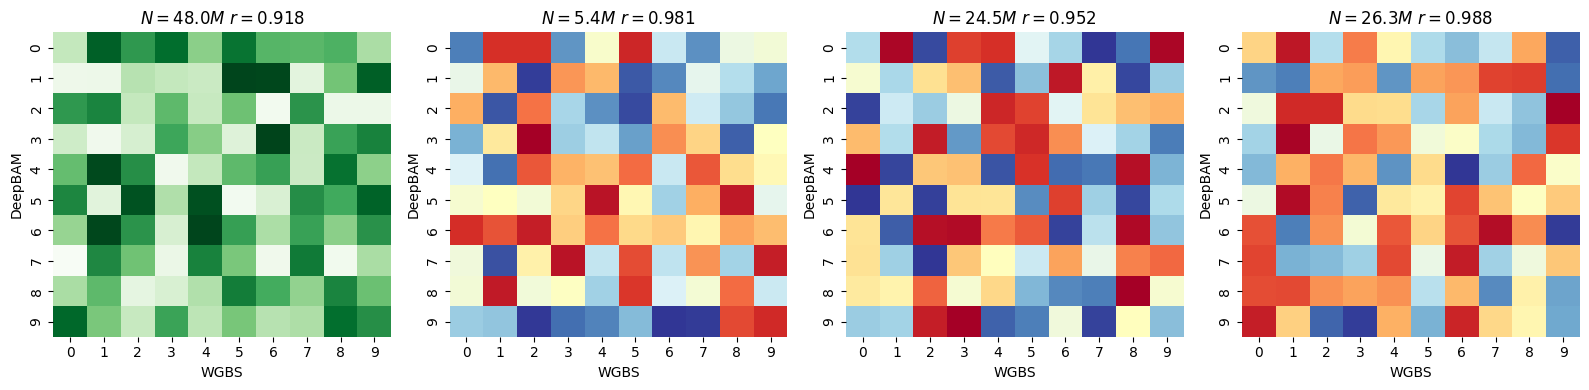

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




plt.tight_layout()
plt.show()


In [8]:
state_dict = torch.load("/public3/YHC/model_merge_ara_oryza_fruitfly/CTC_epoch:20_loss:0.278102_model.pt")

In [91]:
arr = np.load("/public3/YHC/QiTan_basecall_train_mini/reference_lengths.npy")

In [93]:
np.mean(arr)

376.0776244043508

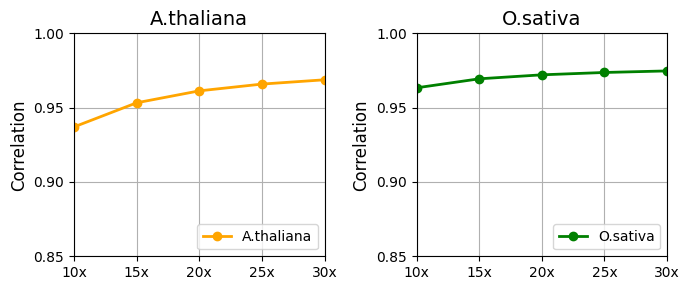

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for x (sequencing depth) and y (correlation)
x = [10, 15, 20, 25, 30]
y1 = [0.937033832073211, 
      0.953273594379425, 
      0.96130633354187, 
      0.965854465961456, 
      0.968749165534973
]  # Correlation values for first line (orange)
y2 = [
    0.963338911533355,
    0.969398558139801, 
    0.972083628177642, 
    0.973664760589599, 
    0.974713504314422,
]
x_labels = ['10x', '15x', '20x', '25x', '30x']

fig, ax = plt.subplots(1, 2 ,figsize=(7, 3))

ax[0].plot(x, y1, marker='o', color='orange', label='A.thaliana', linestyle='-', linewidth=2)

ax[0].set_ylabel('Correlation', fontsize=12)
ax[0].set_title('A.thaliana', fontsize=14)

ax[0].set_ylim([0.85, 1.00])
ax[0].set_xlim([10, 30])

ax[0].set_xticks(x)
ax[0].set_xticklabels(x_labels)  # Set the string labels for x-axis

ax[0].set_yticks([0.85, 0.90, 0.95, 1.00])

ax[0].grid(True)

ax[0].legend(loc='lower right')

ax[1].plot(x, y2, marker='o', color='green', label='O.sativa', linestyle='-', linewidth=2)

ax[1].set_ylabel('Correlation', fontsize=12)
ax[1].set_title('O.sativa', fontsize=14)

ax[1].set_ylim([0.85, 1.00])
ax[1].set_xlim([10, 30])

ax[1].set_xticks(x)
ax[1].set_xticklabels(x_labels)  # Set the string labels for x-axis

ax[1].set_yticks([0.85, 0.90, 0.95, 1.00])

ax[1].grid(True)

ax[1].legend(loc='lower right')

# Display the plot
plt.tight_layout()
plt.show()